In [1]:
#importing the libraries
%matplotlib inline
import pandas as pd
import pandas
import numpy as np
import pyodbc
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from tkinter import *
from datetime import datetime

In [2]:
# Parameters
server = 'ANDREAS\XMPIE'
db = 'DWM'

# Create the connection
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=' +server+ ';DATABASE=' +db+ ';Trusted_Connection=yes')

# query db
sql = """

SELECT * from BARBER_SHOP

"""
df = pd.read_sql(sql, conn)
df.head()

CustomerID FirstName  LastName     IDNumber    Month  Date  HairStyle  \
0        1000    Elifas   Andreas  98020100318  January     1   Buzz cut   
1        1001    Werner   Eliaser  96020412345  January     1  Side part   
2        1002      Toby    Barlos  95112545678  January     1  Side part   
3        1003    Torres  Reinhold  95050800256  January     1   Crew cut   
4        1004      Samy   Andreas  99112678964  January     2   Top knot   

   Price Gender      Time           Location  
0   40.0   Male  09:50:00          Accademia  
1   50.0   Male  10:00:00  Greenwell Matongo  
2   50.0   Male  10:40:00           Hakahana  
3   55.0   Male  11:35:00            Havanna  
4   45.0   Male  08:50:00      Hochland park

In [18]:
#converting hairstyle to numeric
df.loc[df['HairStyle'] == 'Buzz cut', 'style_label'] = 1
df.loc[df['HairStyle'] == 'Side part', 'style_label'] = 2
df.loc[df['HairStyle'] == 'Crew cut', 'style_label'] = 3
df.loc[df['HairStyle'] == 'Top knot', 'style_label'] = 4

#converting gender to numeric
df.loc[df['Gender'] == 'Male','Gender_label'] = 1
df.loc[df['Gender'] == 'Female','Gender_label'] = 2

#converting months to numeric
df.loc[df['Month'] == 'January','Month_label'] = 1
df.loc[df['Month'] == 'February','Month_label'] = 2
df.loc[df['Month'] == 'March','Month_label'] = 3
df.loc[df['Month'] == 'April','Month_label'] = 4

#applying dimesion reduction algorithm
dff = df[['Date','Price','style_label','Gender_label','Month_label']] 
dff.head()

Date  Price  style_label  Gender_label  Month_label
0     1   40.0          1.0           1.0          1.0
1     1   50.0          2.0           1.0          1.0
2     1   50.0          2.0           1.0          1.0
3     1   55.0          3.0           1.0          1.0
4     2   45.0          4.0           1.0          1.0

We used the Kmeans algorith, whic is an nsupervised learning algorithm
that is used to solve clustering problems

In [19]:
#Building and fitting the KMeans algorithm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(dff)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
labels = kmeans.predict(dff)
centroids = kmeans.cluster_centers_

###### Visualizing the results of the k-means algoryth

The graph bellow describes or gives the knowldge on when the barber can take a break from his
work which is our problem that we are solving. The graph shows that the baber has a lot of customers
at the begining and at the end of the month.This means that he can not take a break during that time.
Buy looking at there is a gap from the 15th to the 20th of each and every month. This gives a knowledge 
to the barber the he can take a break as from the 15th to the 20th without his income being affected becase
there are no customers between those dates.

In [43]:
#Visualizing the data: on what time of a month a barber can take a break
def cluster():
    plt.scatter(dff['Month_label'],dff['Date'], c = kmeans.labels_,marker = '*')
    plt.xlabel('Months',fontsize = 20)
    plt.ylabel('Dates',fontsize = 20)
    plt.show()

The graph down here gives information to the barber that he had customers for 
both hairstyles in all the three months that were recorded

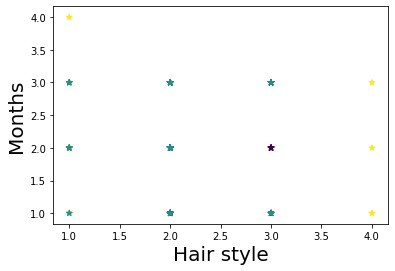

In [44]:
plt.scatter(dff['style_label'],dff['Month_label'], c = kmeans.labels_,marker = '*')
plt.xlabel('Hair style', fontsize = 20)
plt.ylabel('Months',fontsize = 20)
plt.show()

In [45]:
re = """
       SELECT MONTH,DATE,HAIRSTYLE,PRICE FROM BARBER_SHOP
       WHERE MONTH = 'JANUARY'
     """

mon = pd.read_sql(re, conn)
mon.head()

MONTH  DATE  HAIRSTYLE  PRICE
0  January     1   Buzz cut   40.0
1  January     1  Side part   50.0
2  January     1  Side part   50.0
3  January     1   Crew cut   55.0
4  January     2   Top knot   45.0

The graph below shows the barber which hair style made him money during the month of january

In [66]:
def january():
    plt.scatter(mon['HAIRSTYLE'],mon['DATE'])
    plt.xlabel('Hair style', fontsize = 20)
    plt.ylabel('January',fontsize = 20)
    plt.show()

In [67]:
re2 = """
       SELECT MONTH,DATE,HAIRSTYLE,PRICE FROM BARBER_SHOP
       WHERE MONTH = 'FEBRUARY'
     """

mon2 = pd.read_sql(re2, conn)
mon2.head()

MONTH  DATE  HAIRSTYLE  PRICE
0  February     1  Side part   50.0
1  February     1  Side part   50.0
2  February     1   Buzz cut   40.0
3  February     1  Side part   50.0
4  February     1   Crew cut   55.0

The graph below shows the barber which hair style made him money during the month february

In [68]:
def february():
    plt.scatter(mon2['HAIRSTYLE'],mon2['DATE'])
    plt.xlabel('Hair style', fontsize = 20)
    plt.ylabel('February',fontsize = 20)
    plt.show()

In [69]:
re3 = """
       SELECT MONTH,DATE,HAIRSTYLE,PRICE FROM BARBER_SHOP
       WHERE MONTH = 'March'
     """

mon3 = pd.read_sql(re3, conn)
mon3.head()

MONTH  DATE  HAIRSTYLE  PRICE
0  March     1   Crew cut   55.0
1  March     1  Side part   50.0
2  March     1  Side part   50.0
3  March     2   Crew cut   55.0
4  March     2  Side part   50.0

The graph below shows the barber which hair style made him money during the month of March

In [70]:
def march():
    plt.scatter(mon3['HAIRSTYLE'],mon3['DATE'])
    plt.xlabel('Hair style', fontsize = 20)
    plt.ylabel('March',fontsize = 20)
    plt.show()

In [71]:
all = """
       SELECT SUM(PRICE) AS TOTAL_PRICE FROM BARBER_SHOP
       WHERE MONTH = 'FEBRUARY';
       
     """

allm = pd.read_sql(all, conn)
allm.head()

TOTAL_PRICE
0       1815.0

##### Implementing an Isolation forest which is a machine learning algorithm for anomaly detection.

In [72]:
#Implementing the The Forest Model Training for detecting outlires
model = IsolationForest(n_estimators = 50, max_samples = 'auto',
                        contamination = float(0.1), max_features = 1.0)

model.fit(dff[['Price']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=50,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

##### Detecting the outliers using the price column in our dataset

In [73]:
dff['scores'] = model.decision_function(dff[['Price']])
dff['anomaly'] = model.predict(df[['Price']])
dff.head(20)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Date  Price  style_label  Gender_label  Month_label    scores  anomaly
0      1   40.0          1.0           1.0          1.0  0.000000        1
1      1   50.0          2.0           1.0          1.0  0.108022        1
2      1   50.0          2.0           1.0          1.0  0.108022        1
3      1   55.0          3.0           1.0          1.0  0.004940        1
4      2   45.0          4.0           1.0          1.0 -0.138596       -1
5      2   50.0          2.0           1.0          1.0  0.108022        1
6      2   50.0          2.0           1.0          1.0  0.108022        1
7      2   55.0          3.0           1.0          1.0  0.004940        1
8      2   50.0          2.0           1.0          1.0  0.108022        1
9      3   40.0          1.0           1.0          1.0  0.000000        1
10     3   55.0          3.0           1.0          1.0  0.004940        1
11     3   50.0          2.0           1.0          1.0  0.108022        1
12     4   50.0          2.0           2.0          1.0  0.108022        1
13     4   55.0          3.0           2.0          1.0  0.004940        1
14     7   50.0          2.0           1.0          1.0  0.108022        1
15     7   45.0          4.0           1.0          1.0 -0.138596       -1
16     9   50.0          2.0           1.0          1.0  0.108022        1
17    10   50.0          2.0           1.0          1.0  0.108022        1
18    13   40.0          1.0           1.0          1.0  0.000000        1
19    15   50.0          2.0           1.0          1.0  0.108022        1

In [74]:
#printing anomalies
anomaly = dff.loc[dff['anomaly'] == -1]
anomaly_index = list(anomaly.index)
print(anomaly)

    Date  Price  style_label  Gender_label  Month_label    scores  anomaly
4      2   45.0          4.0           1.0          1.0 -0.138596       -1
15     7   45.0          4.0           1.0          1.0 -0.138596       -1
42     4   45.0          4.0           1.0          2.0 -0.138596       -1
76     3   45.0          4.0           1.0          3.0 -0.138596       -1


##### Visualizing the outlires

The graph below shows the outliers in our our dataset, in our case the detectde outlier
is the price for the hair style that did not have a lot of customers. This shows the barber
that there is a certain hair style that a lot of customers tend not to be interested in.

In [75]:
#Visualizing the data
def anomaly():
    plt.scatter(dff['anomaly'],dff['style_label'],  marker = '*')
    plt.xlabel('Anomaly', fontsize = 20)
    plt.ylabel('Hair style',fontsize = 20)
    plt.show()

##### Evaluating the model

In [76]:
outliers_counter = len(dff[dff['Price'] == 45])
outliers_counter

4

In [77]:
#printing the accuracy
print("Accuracy percentage: ",100*list(dff['anomaly']).count(-1)/(outliers_counter),"%")

Accuracy percentage:  100.0 %


In [86]:
import tkinter as tk
from tkinter import messagebox

In [104]:
#making the root widge
root = Tk()
root.geometry('1500x800')
root.title("Registration form")

#function for inserting data to the database
def submit():
    #checking if the textfields are empty
    if len(firstname.get()) == 0 or len(lastname.get()) == 0 or len(idNumber.get()) == 0 or len(location.get()) == 0:
        messagebox.showinfo("Error", "Please enter all feils!")
    else:
        #checking the length of entered data
        if len(firstname.get()) < 3 or len(lastname.get()) < 3 or len(location.get()) < 3:
            messagebox.showinfo("Error", "Please enter a valid name.")
        if len(idNumber.get()) < 11 or len(idNumber.get()) > 11:
            messagebox.showinfo("Error", "The ID number should only contain 11 numbers!.")
        else:
            fName = firstname.get()
            lName = lastname.get()
            idNo = idNumber.get()
            Month = month.get()
            Date = date.get()
            hairSt = hairstyle.get()
            prc = price.get()
            gndr = gender.get()
            loc = location.get()
    
            #calling a stored procedure to insert data to the database
            insert = """\
            EXEC insetCustomer @fName=?,@lName=?,@IDNumber=?,@Month=?,@Date=?,@HairStyle=?,@Price=?,@Gender=?,@Location=?
            """
            args = (fName,lName,idNo,Month,Date,hairSt,prc,gndr,loc)
  
            cursor = conn.cursor()
            cursor.execute(insert,args)
    
            conn.commit()
            conn.close()    
    
            messagebox.showinfo("Success", "Successfully saved!")    
        
        
firstname = StringVar()
lastname = StringVar()
idNumber = StringVar()
month = StringVar()
date = StringVar()
hairstyle = StringVar()
price = StringVar()
gender = StringVar()
location = StringVar()

#Getting the currentTime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")

label0 = Label(root,text = "Inter your data here",width = 20,font = ("bold",20))
label0.place(x = 90,y = 53)

label1 = Label(root, text = "First name",width = 20, font = ("bold",10))
label1.place(x = 1,y = 130)

entry1 = Entry(root, width = 35,textvar = firstname)
entry1.place(x = 120, y = 130)

label2 = Label(root, text = "Last name",width = 20, font = ("bold",10))
label2.place(x = 1,y = 170)

entry2 = Entry(root,width =35, textvar = lastname)
entry2.place(x = 120, y = 170)

label3 = Label(root, text = "ID number",width = 20, font = ("bold",10))
label3.place(x = 1,y = 200)

entry3 = Entry(root, width = 35,textvar = idNumber)
entry3.place(x = 120, y = 200)

label4 = Label(root, text = "Month",width = 20, font = ("bold",10))
label4.place(x = 1,y = 240)

list1 = ['January','February','March','April','May','June','July','August','September','October','November','December'];
droplist = OptionMenu(root,month,*list1)
droplist.config(width = 28)
month.set('Select month')
droplist.place(x = 120,y = 240)

label5 = Label(root, text = "Date",width = 20, font = ("bold",10))
label5.place(x = 1,y = 280)

list2 = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17',
         '18','19','20','21','22','23','24','25','26','27','28','29','30','31'] 

droplist = OptionMenu(root,date,*list2)
droplist.config(width = 28)
date.set('Select date')
droplist.place(x = 120,y = 280)

list4 = ['Buzz cut','Side part','Crew cut','Top knot'] 
droplist = OptionMenu(root,hairstyle,*list4)
droplist.config(width = 28)
hairstyle.set('Select hair style')
droplist.place(x = 120,y = 320)

label6 = Label(root, text = "Hair style",width = 20, font = ("bold",10))
label6.place(x = 1,y = 320)

list5 = ['40','45','50','55'] 
droplist = OptionMenu(root,price,*list5)
droplist.config(width = 28)
price.set('Select price(N$)')
droplist.place(x = 120,y = 360)

label7 = Label(root, text = "Price",width = 20, font = ("bold",10))
label7.place(x = 1,y = 360)

list6 = ['Male','Female','Other'] 
droplist = OptionMenu(root,gender,*list6)
droplist.config(width = 28)
gender.set('Select gender')
droplist.place(x = 120,y = 400)

label6 = Label(root, text = "Gender",width = 20, font = ("bold",10))
label6.place(x = 1,y = 400)

label4 = Label(root, text = "Location",width = 20, font = ("bold",10))
label4.place(x = 1,y = 440)

entry5 = Entry(root,width = 35,textvar = location)
entry5.place(x = 120, y = 440)

def Clear():
    entry1.delete(0,END)
    entry2.delete(0,END)
    entry3.delete(0,END)
    entry5.delete(0,END)
    
button1 = Button(root, text = 'Submit',width=20,bg='brown',fg='white',command=submit).place(x=1,y=520)
button2 = Button(root, text = 'Clear',width=20,bg='brown',fg='white',command=Clear).place(x=200,y=520)

button3 = Button(root, text = 'Display cluster',width=20,bg='brown',fg='white',command=cluster)
button3.pack()
button3.place(x=400, y = 520)

button4 = Button(root, text = 'Display January data',width=20,bg='brown',fg='white',command=january)
button4.pack()
button4.place(x=600, y = 520)

button5 = Button(root, text = 'Display February data',width=20,bg='brown',fg='white',command=february)
button5.pack()
button5.place(x=800, y = 520)

button6 = Button(root, text = 'Display March data',width=20,bg='brown',fg='white',command=march)
button6.pack()
button6.place(x=1000, y = 520)

button7 = Button(root, text = 'Display anomaly',width=20,bg='brown',fg='white',command=anomaly)
button7.pack()
button7.place(x=1200, y = 520)

#Entering the mainloop
root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-104-9549335577f9>", line 32, in submit
    cursor = conn.cursor()
pyodbc.ProgrammingError: Attempt to use a closed connection.
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-104-9549335577f9>", line 32, in submit
    cursor = conn.cursor()
pyodbc.ProgrammingError: Attempt to use a closed connection.
